<a href="https://colab.research.google.com/github/gustavovazquez/ML/blob/main/ML%20-%20SVM%20Tarea%20Kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

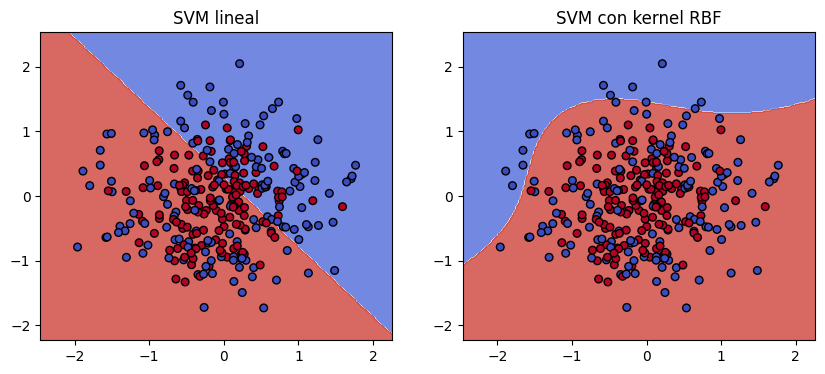

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC

# 1. Generamos un dataset no lineal (círculos concéntricos)
X, y = make_circles(n_samples=300, factor=0.4, noise=0.45, random_state=0)

# 2. Entrenamos dos SVM: uno lineal y otro con kernel RBF
svm_linear = SVC(kernel='linear').fit(X, y)
svm_rbf = SVC(kernel='rbf', gamma=0.2).fit(X, y)

# 3. Función auxiliar para graficar la frontera de decisión
def plot_decision_boundary(model, ax, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
    ax.set_title(title)

# 4. Graficamos
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
plot_decision_boundary(svm_linear, axes[0], "SVM lineal")
plot_decision_boundary(svm_rbf, axes[1], "SVM con kernel RBF")
plt.show()


## Tarea: Exploración de kernels en SVM

### Objetivo
En esta actividad, aplicarás y analizarás el comportamiento de diferentes **kernels** en modelos **SVM (Support Vector Machines)**, observando cómo afectan las fronteras de decisión y el rendimiento del clasificador.

---

### Parte 1: Exploración de kernels

1. Reutiliza el código base donde se grafican las fronteras de decisión de un **SVM lineal** y un **SVM con kernel RBF**.  
   (En dicho código ya se encuentra implementada la función `plot_decision_boundary()`.)

2. Investiga y prueba los **principales kernels disponibles en `scikit-learn`**:
   - `linear`
   - `rbf`
   - `poly`
   - `sigmoid`

Usa los hiperparámetros default para cada caso.

3. Para cada kernel:
   - Entrena un modelo SVM.
   - Grafica su frontera de decisión utilizando `plot_decision_boundary`.

---

### Parte 2: Efecto del ruido y ajuste de hiperparámetros

1. Modifica la generación de datos (`make_circles`) para incorporar ruido:
   ```python
   noise=0.45
   ```

### Instrucciones

1. **Entrena nuevamente** modelos **SVM con kernel RBF** y **SVM con kernel polinómico (`poly`)**.

2. Calcula **accuracy** en un conjunto de prueba para ambos modelos.

3. Ajusta los **hiperparámetros** mediante búsqueda (`GridSearchCV`):

   - Para **RBF**: explora diferentes valores de `C` y `gamma`.  
   - Para **Poly**: explora diferentes valores de `C`, `degree` y `gamma`.

4. **Grafica nuevamente** las fronteras de decisión utilizando los **mejores parámetros encontrados**, e indica visualmente cuál fue la configuración óptima.

